Name: Harshith Akkapelli

Task-2: Time series

Dataset: [Residential Power Usage](https://www.kaggle.com/datasets/srinuti/residential-power-usage-3years-data-timeseries/)

### **Load the dataset**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Dataset_2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial understanding
data.head()


,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


### **EDA**

Data Types and Completeness:

The StartDate has been successfully converted to a datetime format.
There are no null values in the dataset, which simplifies our preprocessing task.
Statistical Summary:

The Value (kWh) column has a wide range, from a minimum of 0.064 to a maximum of 6.446 kWh. Its distribution is right-skewed, indicating higher frequencies of lower values.
The day_of_week column ranges from 0 to 6, likely representing days from Sunday to Saturday (or similar).
Categorical Data:

The notes column has 4 unique categories, with "weekday" being the most frequent.
Trends and Seasonality:

To analyze trends and seasonality, we would need to plot the time-series data of Value (kWh) against StartDate. We can look for patterns like daily cycles, weekly trends, or yearly seasonality.


Time-Series Trends in Value (kWh)

From the time-series plot of Value (kWh) over time, we observe:

A clear cyclic pattern, suggesting daily or weekly seasonality in the data.
Some spikes indicating higher-than-usual values, which might be outliers or special events.

The absence of a long-term upward or downward trend, which suggests that the series is relatively stable over time.

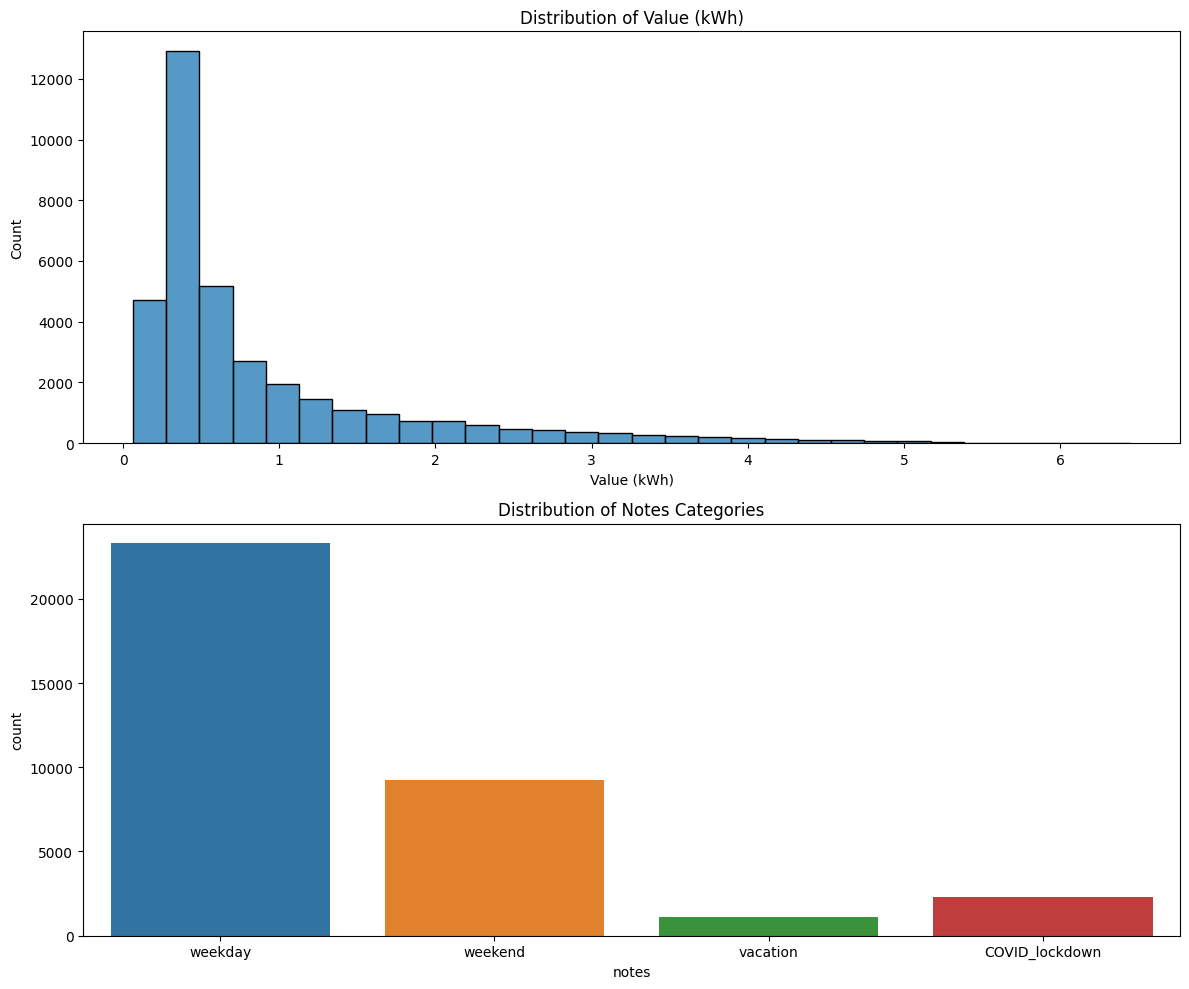

(                            StartDate   Value (kWh)   day_of_week    notes
 count                           35952  35952.000000  35952.000000    35952
 unique                            NaN           NaN           NaN        4
 top                               NaN           NaN           NaN  weekday
 freq                              NaN           NaN           NaN    23299
 mean    2018-06-19 16:28:57.516688896      0.891631      2.997330      NaN
 min               2016-01-06 00:00:00      0.064000      0.000000      NaN
 25%               2017-06-10 11:45:00      0.323750      1.000000      NaN
 50%               2018-06-19 23:30:00      0.501000      3.000000      NaN
 75%               2019-06-29 11:15:00      1.072000      5.000000      NaN
 max               2020-12-06 23:00:00      6.446000      6.000000      NaN
 std                               NaN      0.908133      1.999024      NaN,
 StartDate      0
 Value (kWh)    0
 day_of_week    0
 notes          0
 dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'StartDate' to datetime if not already
data['StartDate'] = pd.to_datetime(data['StartDate'], errors='coerce')

# Basic summary of the dataset
summary_info = data.describe(include='all', datetime_is_numeric=True)

# Checking for null values
null_values = data.isnull().sum()

# Plotting distributions of numerical and categorical data
def plot_distributions(df):
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))

    # Plotting numerical data
    sns.histplot(df['Value (kWh)'], bins=30, ax=ax[0])
    ax[0].set_title('Distribution of Value (kWh)')

    # Plotting categorical data
    sns.countplot(x='notes', data=df, ax=ax[1])
    ax[1].set_title('Distribution of Notes Categories')

    plt.tight_layout()
    plt.show()

plot_distributions(data)

(summary_info, null_values)


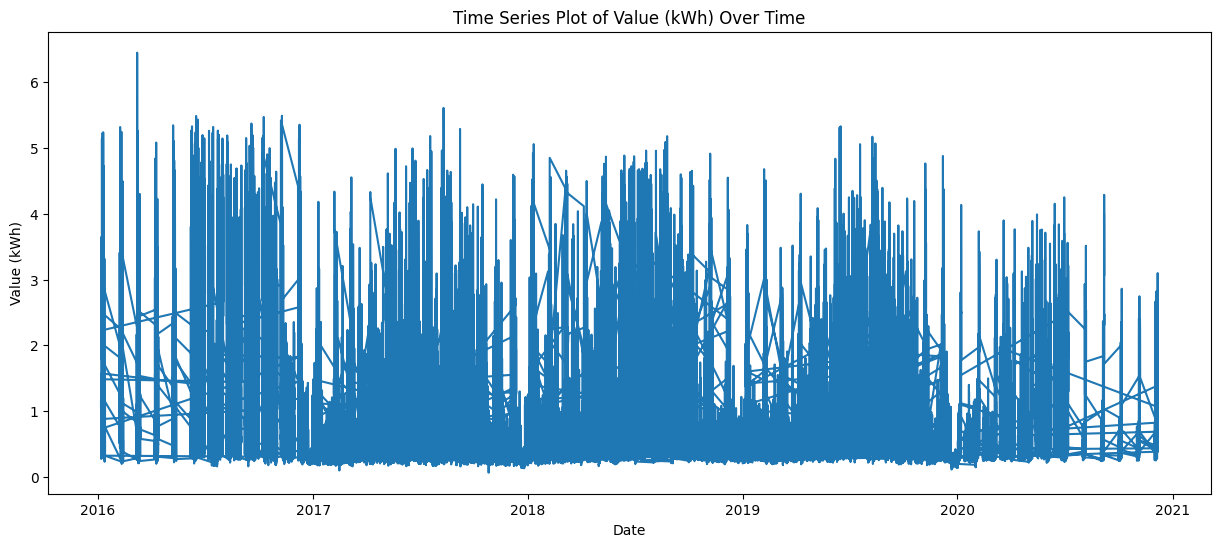

In [ ]:
# Plotting the time-series trends
plt.figure(figsize=(15, 6))
plt.plot(data['StartDate'], data['Value (kWh)'])
plt.title('Time Series Plot of Value (kWh) Over Time')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.show()


### **Auto EDA**

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



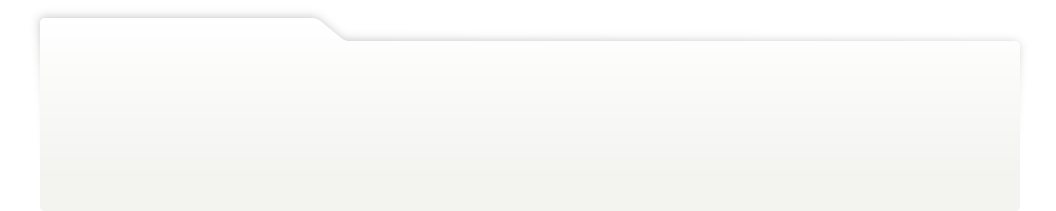
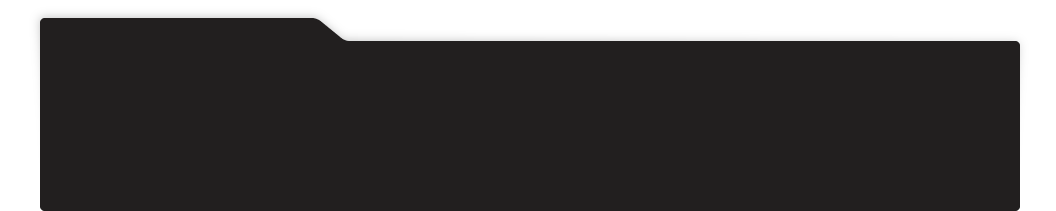
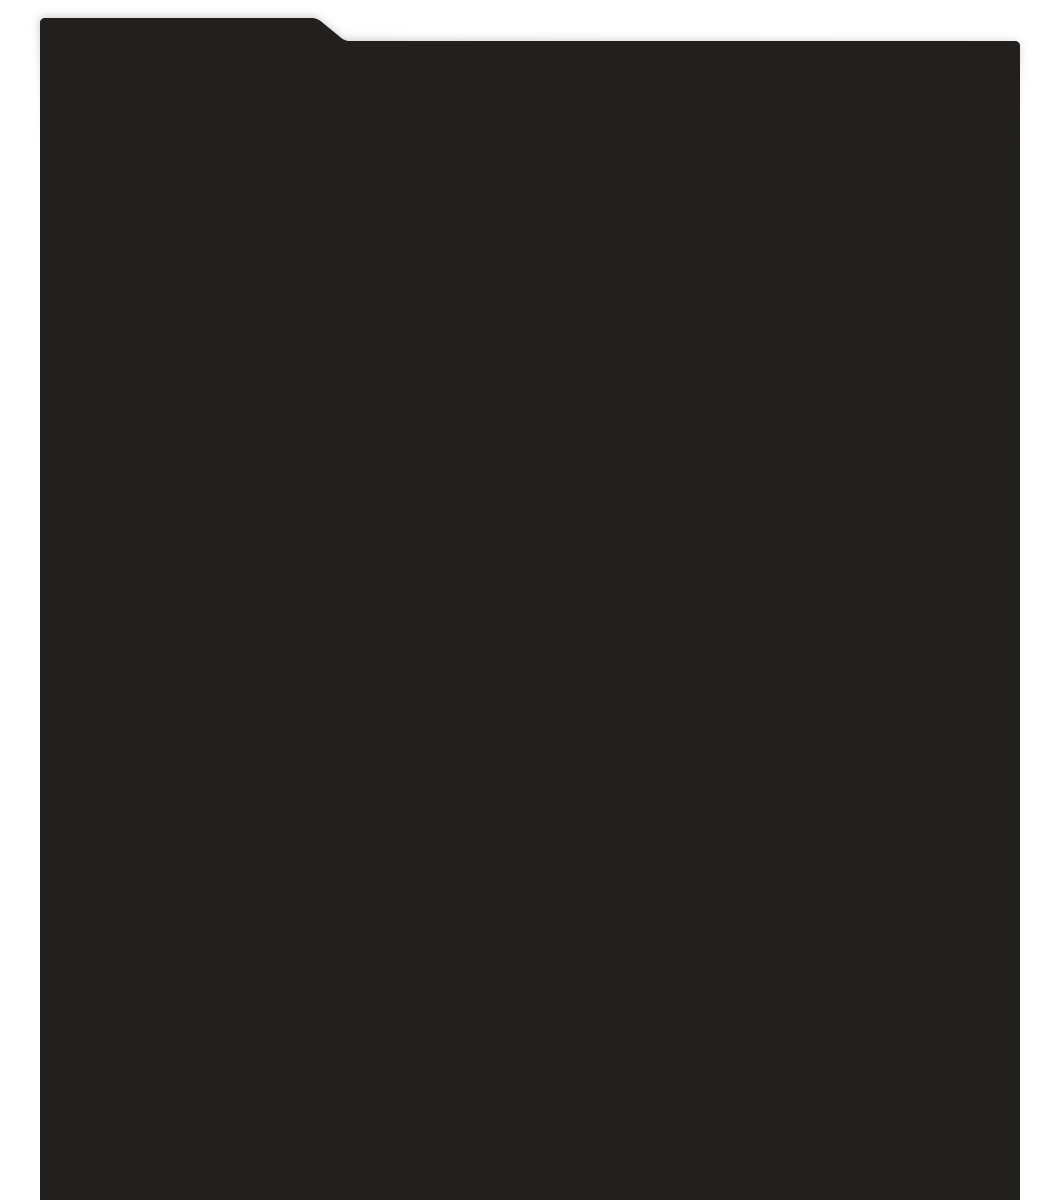
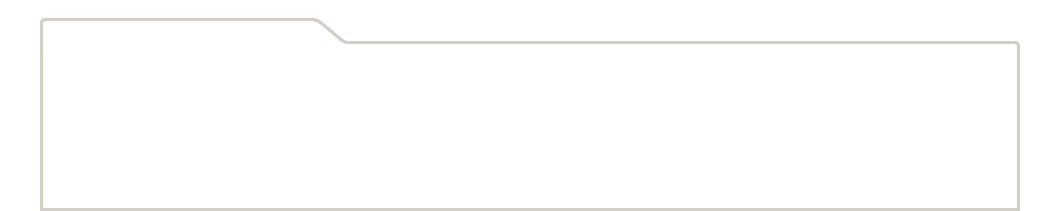
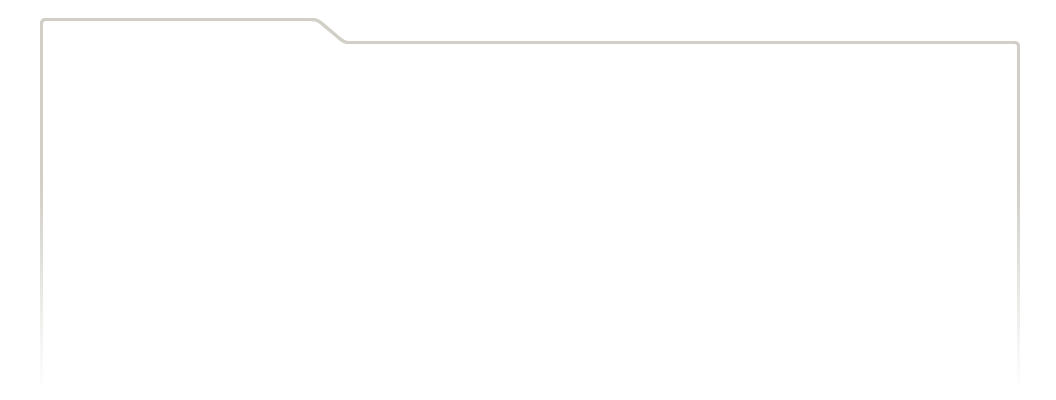
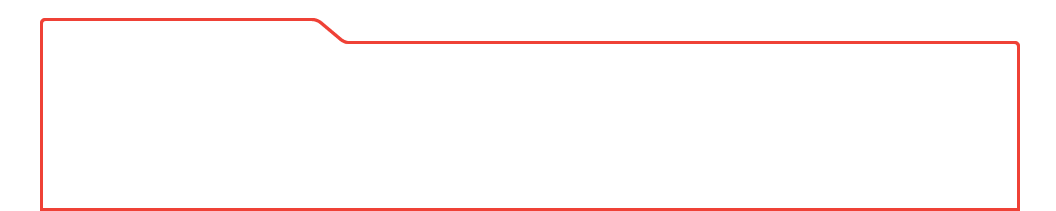
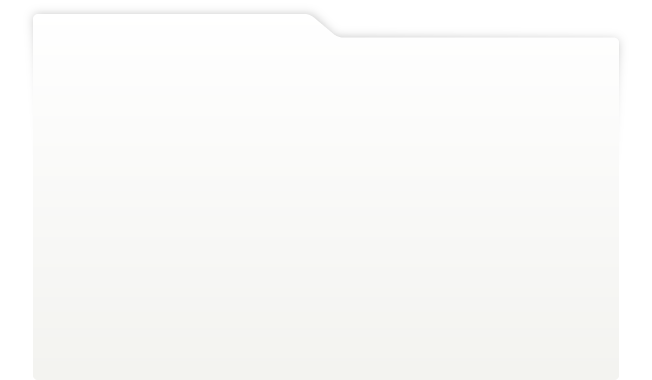
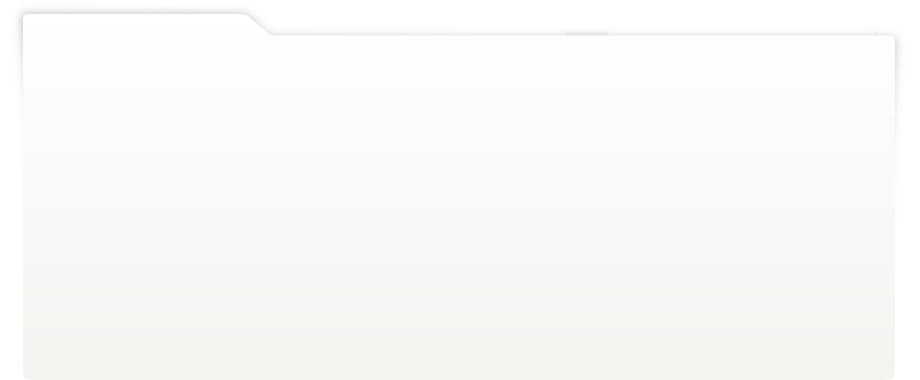
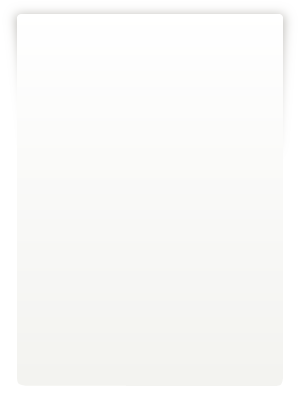
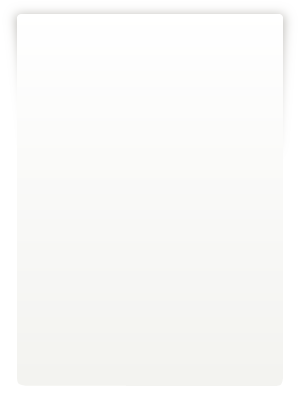
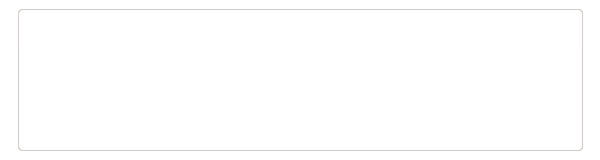
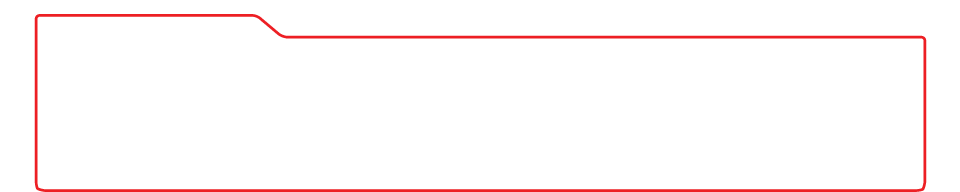
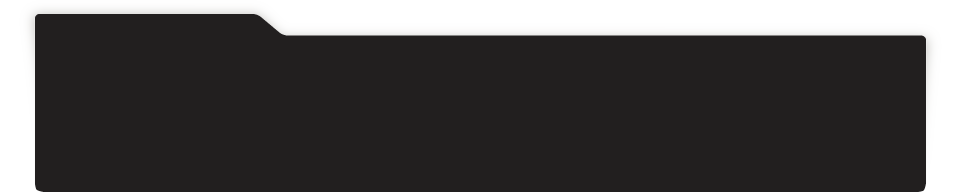
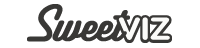
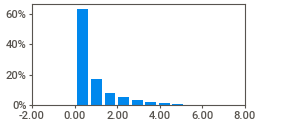
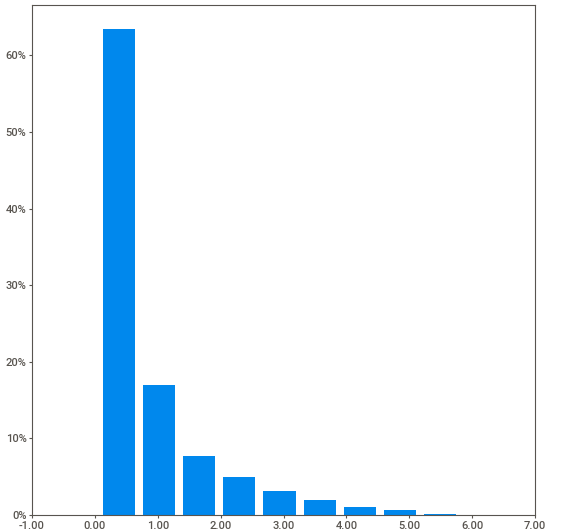
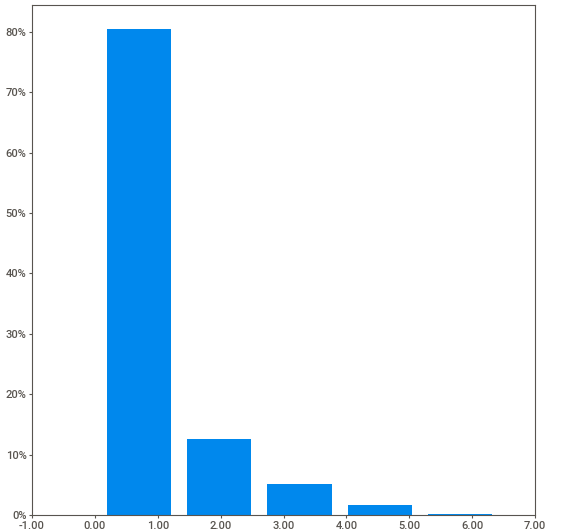
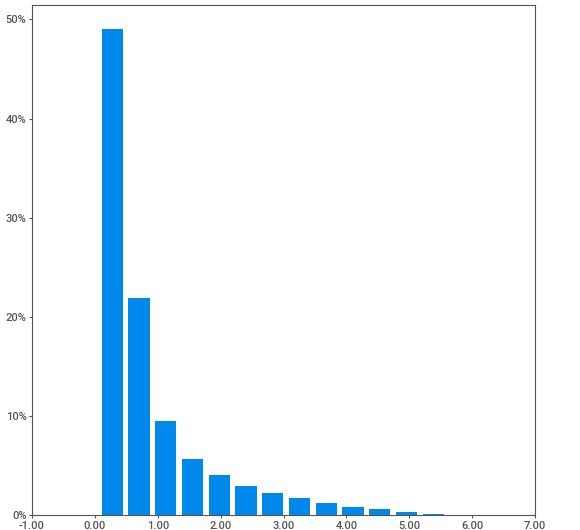
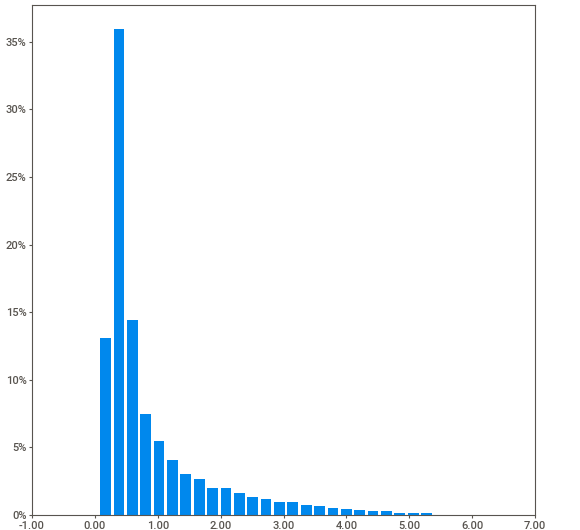
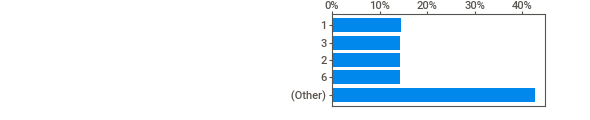
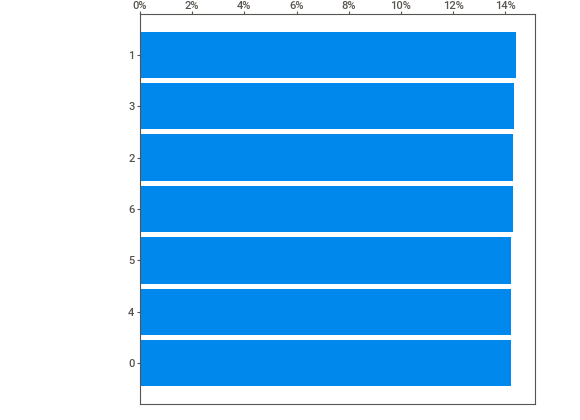
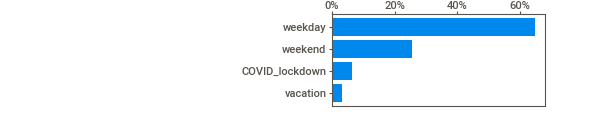
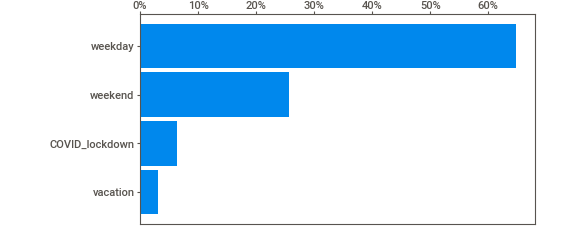
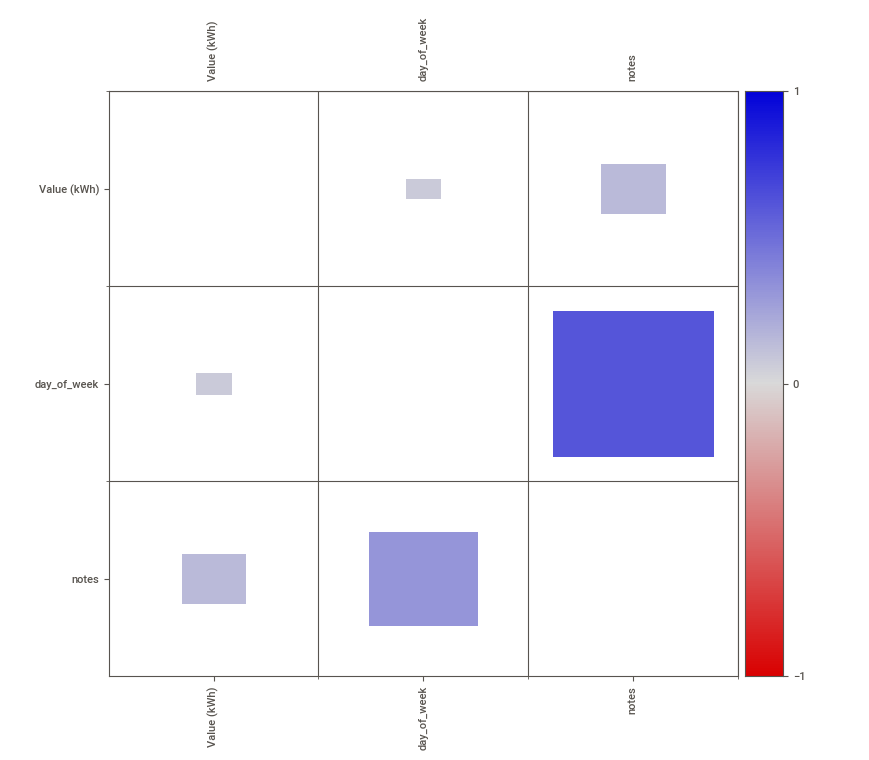
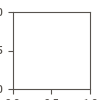

In [ ]:
import sweetviz as sv

# Analyze the dataset
report = sv.analyze(data)

# Display the report
report.show_html('report.html')
from IPython.core.display import display, HTML

with open('report.html', 'r') as f:
    display(HTML(f.read()))

### **Outlier Analysis, Categorical Encoding and Feature Extraction**



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Outlier Detection and Handling using IQR
Q1 = data['Value (kWh)'].quantile(0.25)
Q3 = data['Value (kWh)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging outliers
data['outlier'] = ((data['Value (kWh)'] < lower_bound) | (data['Value (kWh)'] > upper_bound))

# Categorical Encoding for 'notes'
label_encoder = LabelEncoder()
data['notes_encoded'] = label_encoder.fit_transform(data['notes'])

# Feature Engineering: Extracting hour, month, year from StartDate
data['hour'] = data['StartDate'].dt.hour
data['month'] = data['StartDate'].dt.month
data['year'] = data['StartDate'].dt.year

# Displaying the updated dataset
data.head()


,StartDate,Value (kWh),day_of_week,notes,outlier,notes_encoded,hour,month,year
0,2016-01-06 00:00:00,1.057,2,weekday,False,2,0,1,2016
1,2016-01-06 01:00:00,1.171,2,weekday,False,2,1,1,2016
2,2016-01-06 02:00:00,0.560,2,weekday,False,2,2,1,2016
3,2016-01-06 03:00:00,0.828,2,weekday,False,2,3,1,2016
4,2016-01-06 04:00:00,0.932,2,weekday,False,2,4,1,2016


In [ ]:
# Capping the outliers
data.loc[data['Value (kWh)'] < lower_bound, 'Value (kWh)'] = lower_bound
data.loc[data['Value (kWh)'] > upper_bound, 'Value (kWh)'] = upper_bound

# Finalizing the feature set for model building
# Dropping redundant columns ('StartDate', 'notes', and 'outlier')
final_data = data.drop(columns=['StartDate', 'notes', 'outlier'])

# Display the final dataset ready for clustering and anomaly detection
final_data.head()


,Value (kWh),day_of_week,notes_encoded,hour,month,year
0,1.057,2,2,0,1,2016
1,1.171,2,2,1,1,2016
2,0.560,2,2,2,1,2016
3,0.828,2,2,3,1,2016
4,0.932,2,2,4,1,2016


### **Clustering and anamoly deletction**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

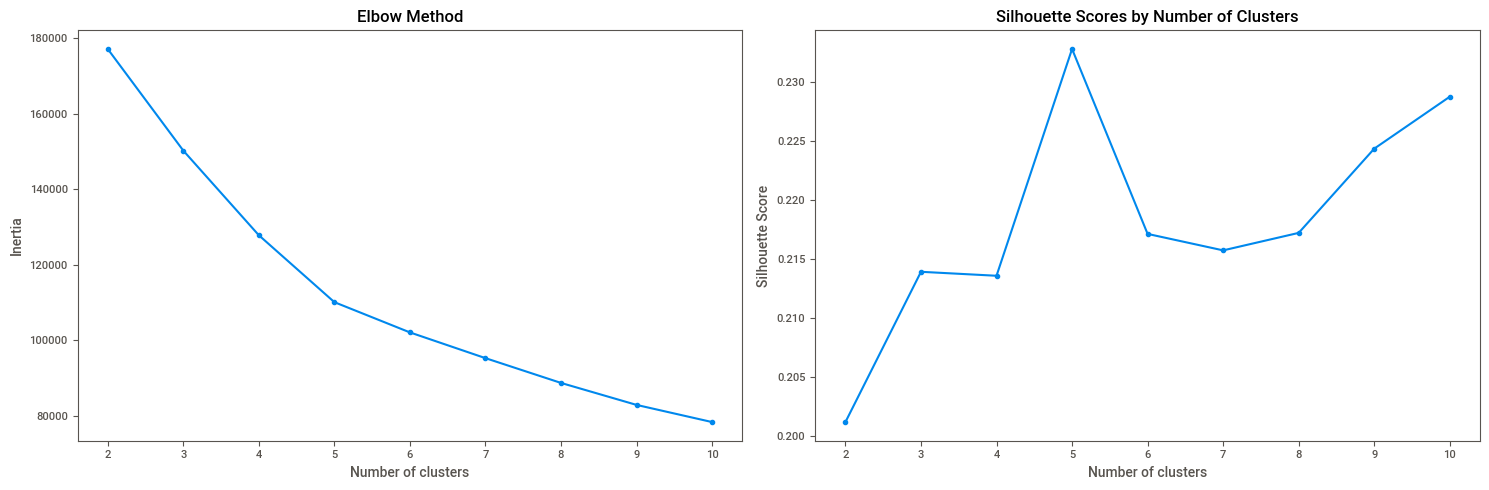

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Standardizing the data before applying K-Means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Scores
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Inertia plot (Elbow Method)
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

# Silhouette Score plot
ax[1].plot(K_range, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Scores by Number of Clusters')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = iso_forest.fit_predict(scaled_data)

# Adding the anomalies to the dataset
final_data['anomaly'] = anomalies

# Display a few rows with detected anomalies (anomaly = -1)
final_data[final_data['anomaly'] == -1].head()


,Value (kWh),day_of_week,notes_encoded,hour,month,year,anomaly
0,1.057,2,2,0,1,2016,-1
1,1.171,2,2,1,1,2016,-1
2,0.560,2,2,2,1,2016,-1
3,0.828,2,2,3,1,2016,-1
4,0.932,2,2,4,1,2016,-1


### **Feature Selection**

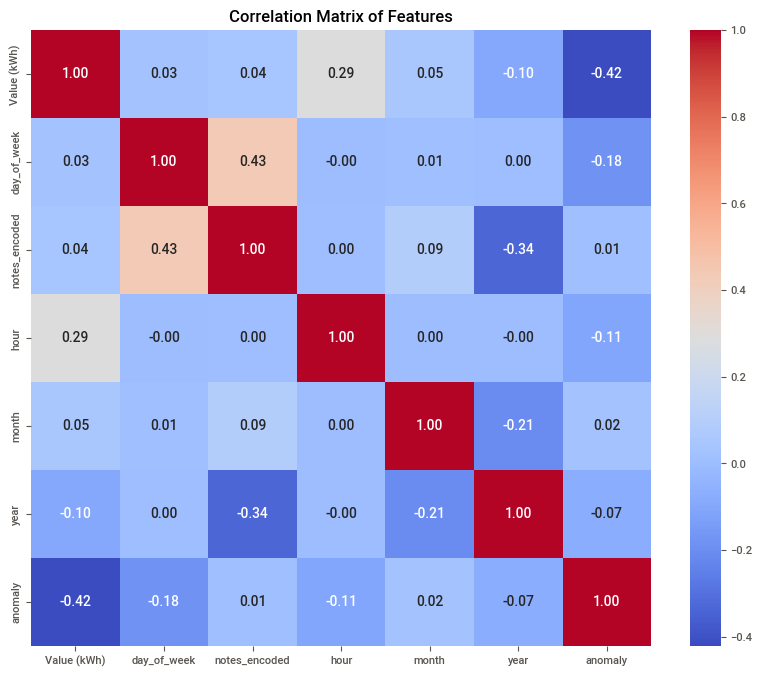

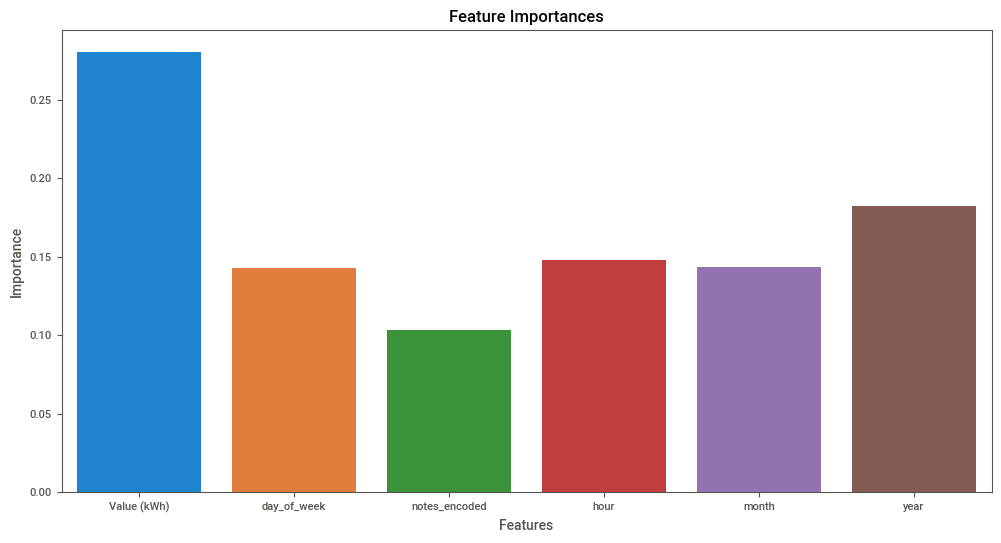

In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = final_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Assessing feature importance using a Random Forest
from sklearn.ensemble import RandomForestClassifier

# Preparing data for feature importance analysis
X = final_data.drop('anomaly', axis=1)
y = final_data['anomaly']

# Fitting a Random Forest model to assess feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Getting the feature importance
feature_importances = rf_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


### **Auto ML**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 70.0 MB/s e

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have s

In [ ]:
from pycaret.regression import *
reg = setup(data=final_data, target='Value (kWh)')


,Description,Value
0,Session id,1440
1,Target,Value (kWh)
2,Target type,Regression
3,Original data shape,"(35952, 7)"
4,Transformed data shape,"(35952, 7)"
5,Transformed train set shape,"(25166, 7)"
6,Transformed test set shape,"(10786, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
rf = create_model('rf')
gbr = create_model('gbr')
lr = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2901,0.1879,0.4334,0.5047,0.2178,0.5043
1,0.2864,0.1960,0.4427,0.5277,0.2203,0.4855
2,0.2967,0.2022,0.4497,0.5154,0.2246,0.4946
3,0.2934,0.1969,0.4437,0.5188,0.2205,0.4874
4,0.2939,0.1984,0.4455,0.5045,0.2217,0.5015
5,0.3003,0.2072,0.4552,0.5058,0.2274,0.5055
6,0.2890,0.1945,0.4411,0.5073,0.2219,0.4929
7,0.3068,0.2197,0.4687,0.4674,0.2340,0.5222
8,0.2842,0.1937,0.4402,0.5387,0.2189,0.4737


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3059,0.1753,0.4187,0.5378,0.2126,0.5553
1,0.3091,0.1796,0.4238,0.5671,0.2112,0.5412
2,0.3110,0.1800,0.4243,0.5687,0.2117,0.5313
3,0.3089,0.1771,0.4208,0.5672,0.2109,0.5461
4,0.3132,0.1793,0.4234,0.5523,0.2109,0.5488
5,0.3138,0.1823,0.4269,0.5652,0.2118,0.5439
6,0.3102,0.1802,0.4245,0.5436,0.2144,0.5553
7,0.3224,0.1958,0.4425,0.5253,0.2214,0.5763
8,0.3033,0.1715,0.4141,0.5917,0.2071,0.5258


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4197,0.2839,0.5329,0.2515,0.2707,0.7793
1,0.4363,0.3037,0.5511,0.2681,0.2761,0.7971
2,0.4436,0.3151,0.5613,0.2449,0.2802,0.7860
3,0.4317,0.2972,0.5452,0.2736,0.2751,0.8042
4,0.4374,0.3074,0.5545,0.2324,0.2801,0.8103
5,0.4370,0.3099,0.5567,0.2607,0.2783,0.7964
6,0.4288,0.2966,0.5446,0.2488,0.2768,0.8012
7,0.4454,0.3173,0.5633,0.2307,0.2845,0.8435
8,0.4345,0.3044,0.5518,0.2751,0.2763,0.7921


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **Ensemble Model**

In [ ]:
blended = blend_models(estimator_list=[rf, gbr, lr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3128,0.1747,0.4180,0.5395,0.2119,0.5738
1,0.3215,0.1844,0.4294,0.5557,0.2140,0.5718
2,0.3265,0.1896,0.4354,0.5457,0.2165,0.5669
3,0.3216,0.1833,0.4281,0.5520,0.2139,0.5756
4,0.3276,0.1864,0.4317,0.5347,0.2162,0.5863
5,0.3267,0.1899,0.4357,0.5471,0.2169,0.5788
6,0.3186,0.1814,0.4259,0.5407,0.2153,0.5793
7,0.3366,0.2020,0.4495,0.5102,0.2250,0.6101
8,0.3185,0.1811,0.4256,0.5688,0.2120,0.5620


Processing:   0%|          | 0/6 [00:00<?, ?it/s]